In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [9]:
df = pd.read_csv('USA_Housing.csv')

In [11]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [15]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [17]:
df.describe

<bound method NDFrame.describe of       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0       

<Axes: xlabel='Price', ylabel='Count'>

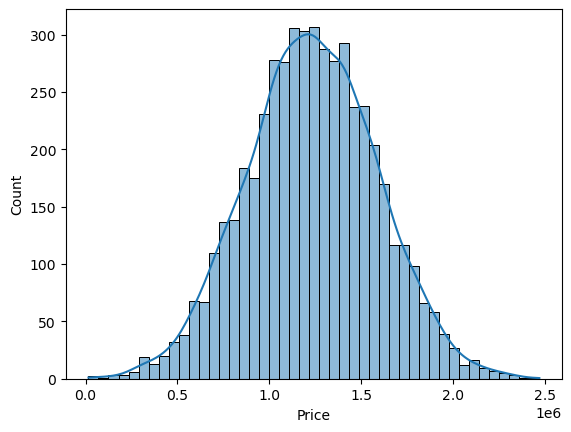

In [21]:
sns.histplot(df['Price'], kde=True)

<Axes: >

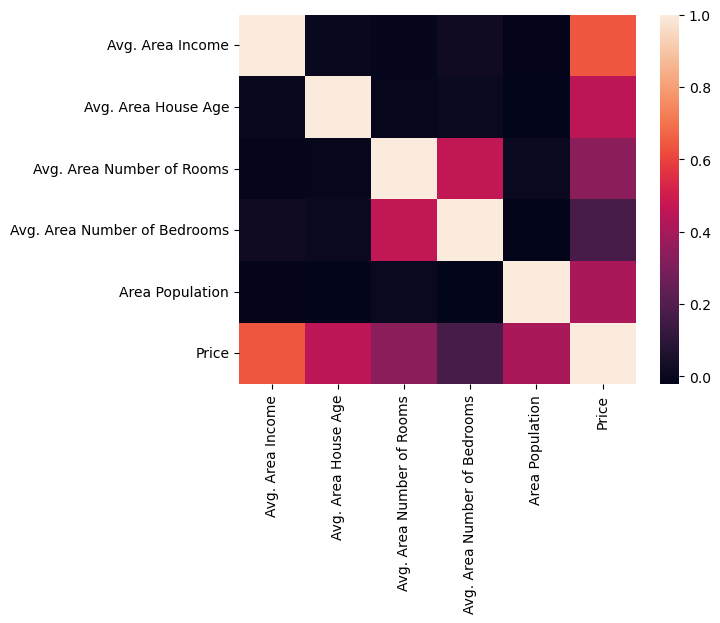

In [25]:
sns.heatmap(df.corr(numeric_only=True))

In [27]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [29]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [31]:
Y = df['Price']

In [33]:
Y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [37]:
X_test, X_train, Y_test, Y_train = train_test_split(X, Y, test_size=0.4, random_state=101)

In [39]:
lm = LinearRegression()

In [41]:
lm.fit(X_train, Y_train)

LinearRegression()

In [43]:
lm.intercept_

-2635047.114192567

In [45]:
lm.coef_

array([2.16746734e+01, 1.66700326e+05, 1.18246879e+05, 7.58240625e+02,
       1.52746376e+01])

In [47]:
preds = lm.predict(X_test)

<Axes: ylabel='Price'>

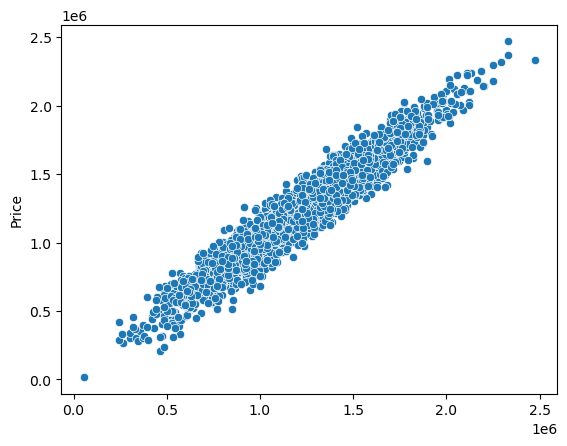

In [55]:
sns.scatterplot(x=preds, y=Y_test)

<Axes: xlabel='Price', ylabel='Count'>

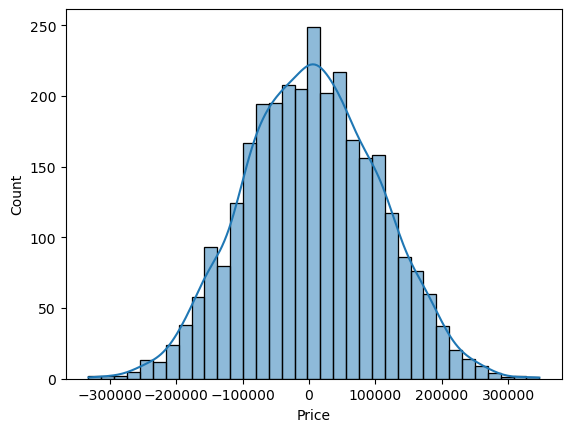

In [59]:
sns.histplot((Y_test-preds), kde=True)

In [63]:
np.sqrt(metrics.mean_squared_error(Y_test,preds))

100622.68430225637

In [67]:
lm.predict([[3,7,13,56,20]])

E:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([111896.5872333])

In [71]:
X_new = np.array([
    [70000, 6.0, 7.5, 4.0, 30000],  # New data point 1
    [85000, 4.5, 8.0, 3.5, 35000],  # New data point 2
    [65000, 7.0, 6.0, 5.0, 25000]   # New data point 3
])

# Predict the output for the new data
lm.predict(X_new)

E:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1230505.66345738, 1440692.78354728, 1035847.35577576])